
# Heart Disease Dataset


This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.
We are going to build models to predict the presence of heart disease based on features and evaluate the models

Train Data Columns Information

Age : Age of the patient

Sex : Sex of the patient (1 = male; 0 = female)

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type
Value 0: typical angina
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: asymptomatic


chol : cholestoral in mg/dl fetched via BMI sensor

trtbps : resting blood pressure (in mm Hg)

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import os
import time
import plotly.express as px

In [ ]:
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset

  0% 0.00/4.11k [00:00<?, ?B/s]
100% 4.11k/4.11k [00:00<00:00, 4.32MB/s]


In [ ]:
!unzip "/content/heart-attack-analysis-prediction-dataset.zip"

Archive:  /content/heart-attack-analysis-prediction-dataset.zip
replace heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: heart.csv               
replace o2Saturation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: o2Saturation.csv        


In [ ]:
# Train 
train_df=pd.read_csv("/content/heart.csv")
train_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


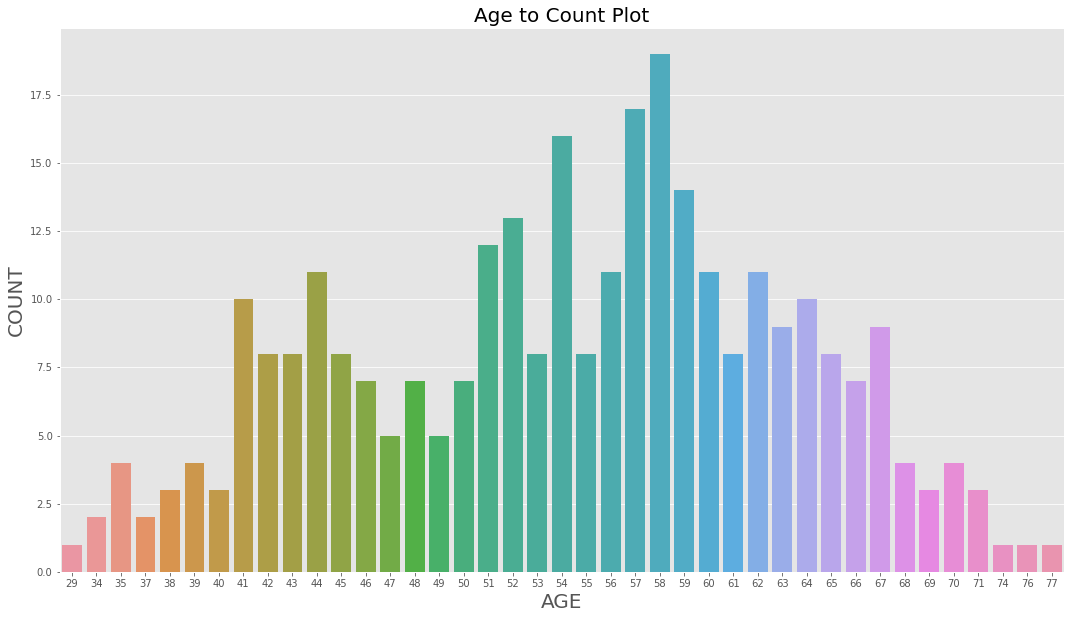

In [ ]:
# age to count plot
plt.figure(figsize=(18,10))
plt.style.use("ggplot")
sns.countplot(x=train_df["age"])    #using countplot
plt.title("Age to Count Plot",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

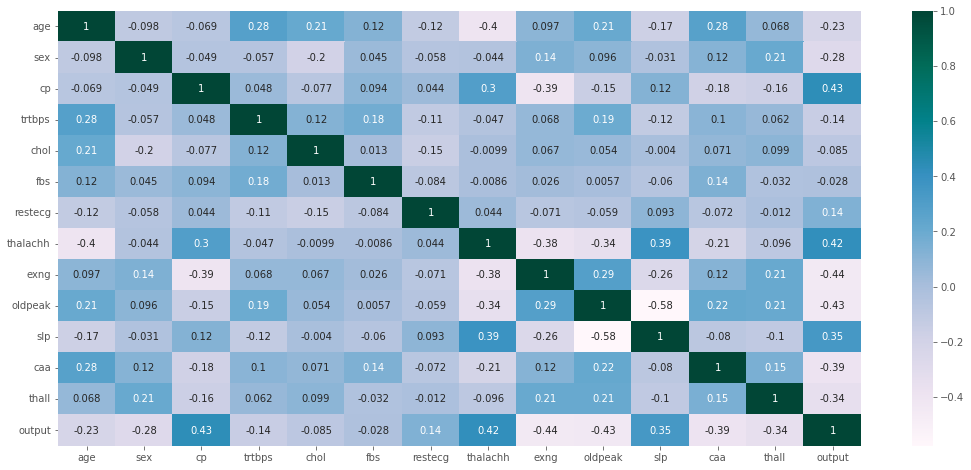

In [ ]:
# correlation among the variables
plt.figure(figsize=(18,8))
sns.heatmap(train_df.corr(),annot=True,cmap="PuBuGn")

In [ ]:
# Male to Female Heart Attack Count
data=train_df["sex"].value_counts().reset_index()
px.pie(data,names=["Male","Female"],values='sex',color_discrete_sequence=px.colors.sequential.RdBu)

In [ ]:
# Chest pain type and patient count
chest_pain_count=train_df["cp"].value_counts().reset_index()
chest_pain_count

,index,cp
0,0,143
1,2,87
2,1,50
3,3,23


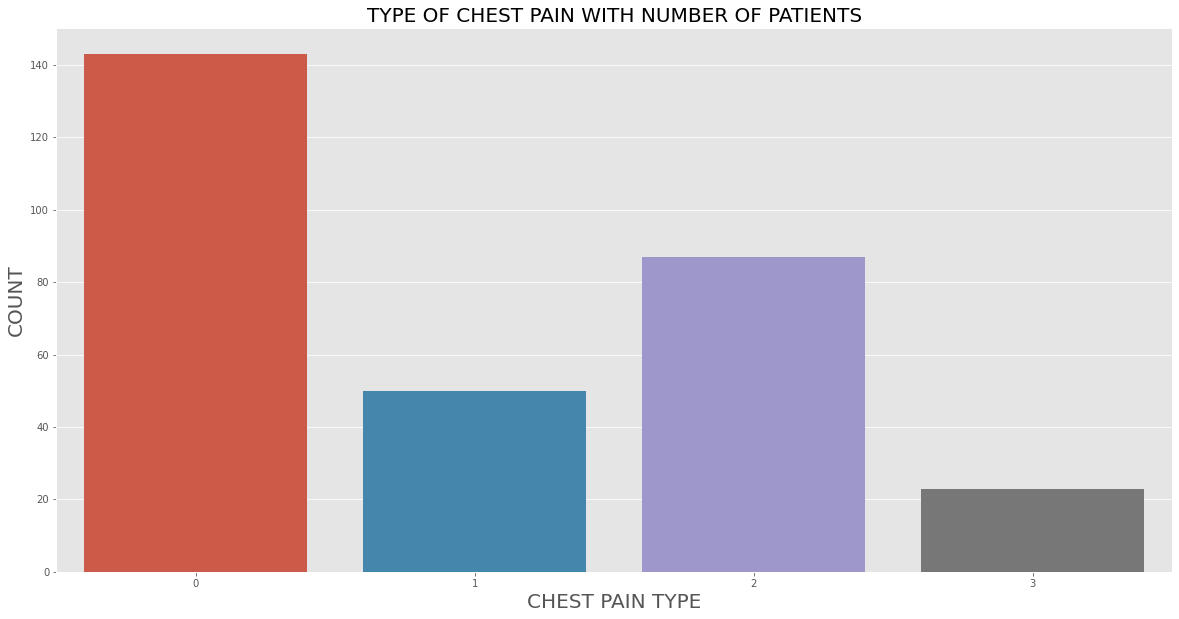

In [ ]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.barplot(x=chest_pain_count["index"],y=chest_pain_count["cp"])   
plt.title("TYPE OF CHEST PAIN WITH NUMBER OF PATIENTS",fontsize=20)
plt.xlabel("CHEST PAIN TYPE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

Most of the people are suffering from 'typical angina' type chest pain

<Figure size 1440x720 with 0 Axes>

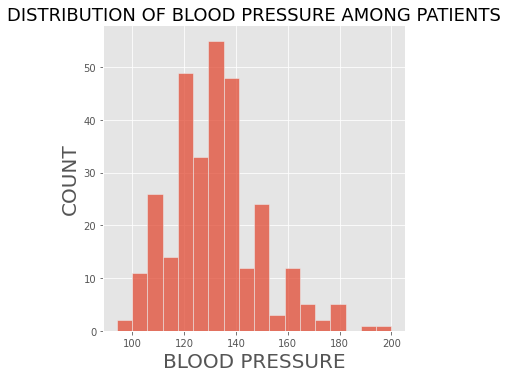

In [ ]:
# Blood Pressure distribution among patients
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.displot(train_df["trtbps"])   #using displot here
plt.title("DISTRIBUTION OF BLOOD PRESSURE AMONG PATIENTS",fontsize=18)
plt.xlabel("BLOOD PRESSURE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

<Figure size 2880x4320 with 0 Axes>

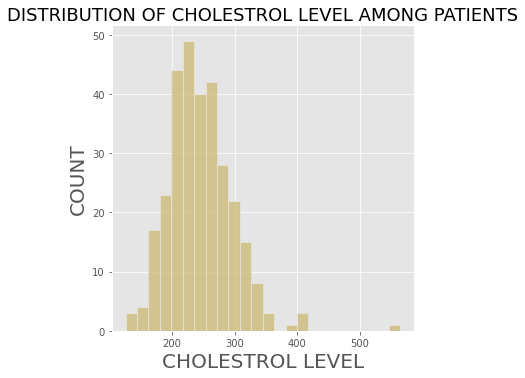

In [ ]:
# Cholestrol distribution vs patients count
plt.figure(figsize=(40,60))
plt.style.use("ggplot")
sns.set_color_codes()
sns.displot(train_df["chol"],color="y")
plt.title("DISTRIBUTION OF CHOLESTROL LEVEL AMONG PATIENTS",fontsize=18)
plt.xlabel("CHOLESTROL LEVEL",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

<Figure size 1440x720 with 0 Axes>

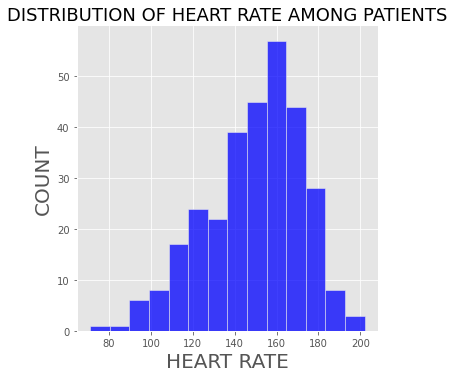

In [ ]:
# Heart rate vs patient count
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.displot(train_df["thalachh"],color="blue")
plt.title("DISTRIBUTION OF HEART RATE AMONG PATIENTS",fontsize=18)
plt.xlabel("HEART RATE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

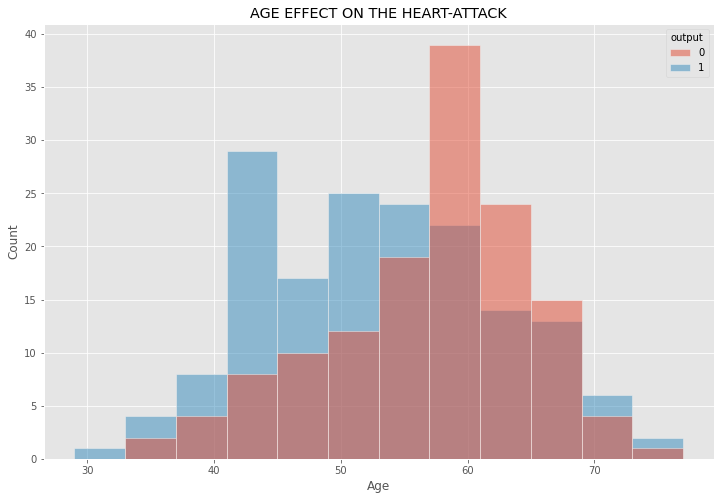

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
sns.histplot(data = train_df, x = 'age', hue = 'output')
plt.title("AGE EFFECT ON THE HEART-ATTACK")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Inferences:
In general, 40 to 60 aged people have more chance of heart attack.

Resting Blood Pressure - range of 120 to 140

Cholesterol level - 200 to 260

# Prediction 

In [ ]:
# Libraries
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [ ]:
train_df.drop_duplicates(inplace=True)
train_df.reset_index(drop=True, inplace=True)

In [ ]:
train_df.reset_index(drop=True,inplace=True)
train_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Standardization
x = train_df.iloc[:, :-1].values
y = train_df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#Machine Learning Models
key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),xgb.XGBClassifier()]
models = dict(zip(key,value))

In [ ]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.8688524590163934
KNeighborsClassifier 0.9180327868852459
SVC 0.9344262295081968
DecisionTreeClassifier 0.7868852459016393
RandomForestClassifier 0.8524590163934426
GradientBoostingClassifier 0.819672131147541
AdaBoostClassifier 0.9180327868852459
XGBClassifier 0.8360655737704918


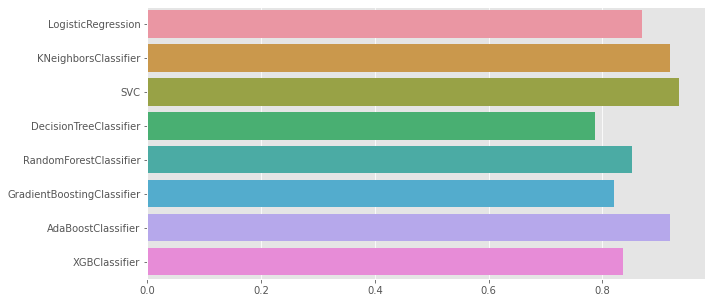

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = predicted, y = key)
# plt.show()

Best accucary is of SVC model ~93%.